In [51]:
import tensorflow_datasets as tfds
import tensorflow as tf
from app import anaylze_text

In [52]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

In [53]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_examples, test_examples = dataset['train'], dataset['test']

In [54]:
encoder = info.features['text'].encoder

In [55]:
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [56]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [57]:
assert original_string == sample_string

In [58]:
for index in encoded_string:
  print('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


In [59]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [60]:
train_dataset = (train_examples
                 .shuffle(BUFFER_SIZE)
                 .padded_batch(BATCH_SIZE, padded_shapes=([None],[])))

test_dataset = (test_examples
                .padded_batch(BATCH_SIZE,  padded_shapes=([None],[])))

In [61]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [62]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [63]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 1476s 4s/step - loss: 0.6627 - accuracy: 0.5346 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 1364s 3s/step - loss: 0.3748 - accuracy: 0.8313 - val_loss: 0.3402 - val_accuracy: 0.8693
Epoch 3/10
391/391 [==============================] - 1455s 4s/step - loss: 0.2558 - accuracy: 0.9000 - val_loss: 0.3256 - val_accuracy: 0.8714
Epoch 4/10
391/391 [==============================] - 1510s 4s/step - loss: 0.2161 - accuracy: 0.9178 - val_loss: 0.3366 - val_accuracy: 0.8734
Epoch 5/10
391/391 [==============================] - 1321s 3s/step - loss: 0.1825 - accuracy: 0.9323 - val_loss: 0.3297 - val_accuracy: 0.8672
Epoch 6/10
391/391 [==============================] - 5033s 13s/step - loss: 0.1601 - accuracy: 0.9425 - val_loss: 0.3575 - val_accuracy: 0.8714
Epoch 7/10
391/391 [==============================] - 44030s 113s/step - loss: 0.1466 - accuracy: 0.9476 - val_loss: 0.3521 - v

In [64]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 271s 693ms/step - loss: 0.4158 - accuracy: 0.8564
Test Loss: 0.41581001340428275
Test Accuracy: 0.8564000129699707


In [65]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [66]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [67]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[-0.31869692]]


In [68]:
# predict on a sample text with padding

sample_pred_text =
# but in the text file 
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

NameError: name 'analyze_text' is not defined

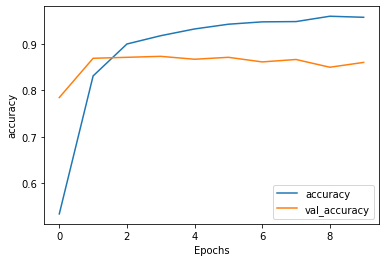

In [69]:
plot_graphs(history, 'accuracy')

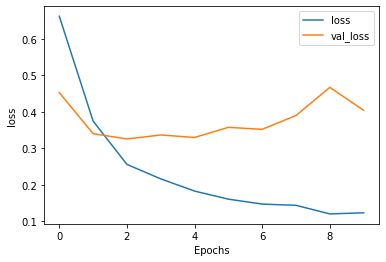

In [70]:
plot_graphs(history, 'loss')

In [71]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [72]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [73]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 2048s 5s/step - loss: 0.6794 - accuracy: 0.5203 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 2037s 5s/step - loss: 0.4119 - accuracy: 0.8243 - val_loss: 0.3677 - val_accuracy: 0.8521
Epoch 3/10
391/391 [==============================] - 2074s 5s/step - loss: 0.2873 - accuracy: 0.8934 - val_loss: 0.3448 - val_accuracy: 0.8667
Epoch 4/10
391/391 [==============================] - 1607s 4s/step - loss: 0.2278 - accuracy: 0.9220 - val_loss: 0.3613 - val_accuracy: 0.8719
Epoch 5/10
391/391 [==============================] - 1956s 5s/step - loss: 0.1979 - accuracy: 0.9346 - val_loss: 0.3849 - val_accuracy: 0.8505
Epoch 6/10
391/391 [==============================] - 2123s 5s/step - loss: 0.1679 - accuracy: 0.9489 - val_loss: 0.4223 - val_accuracy: 0.8609
Epoch 7/10
391/391 [==============================] - 6389s 16s/step - loss: 0.1413 - accuracy: 0.9582 - val_loss: 0.4254 - val_